In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [86]:
# Load the dfset
file_path = 'filtered_global_education_world_happiness_average.csv'
df = pd.read_csv(file_path)




In [87]:
# Calculate the average education score
df['Average_Education_Score'] = df[['Average_Completion_Rate_Male', 'Average_Completion_Rate_Female', 
                                        'Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math']].mean(axis=1)


Pearson correlation between Average Education Score and Happiness: r = 0.40, p-value = 2.07e-06


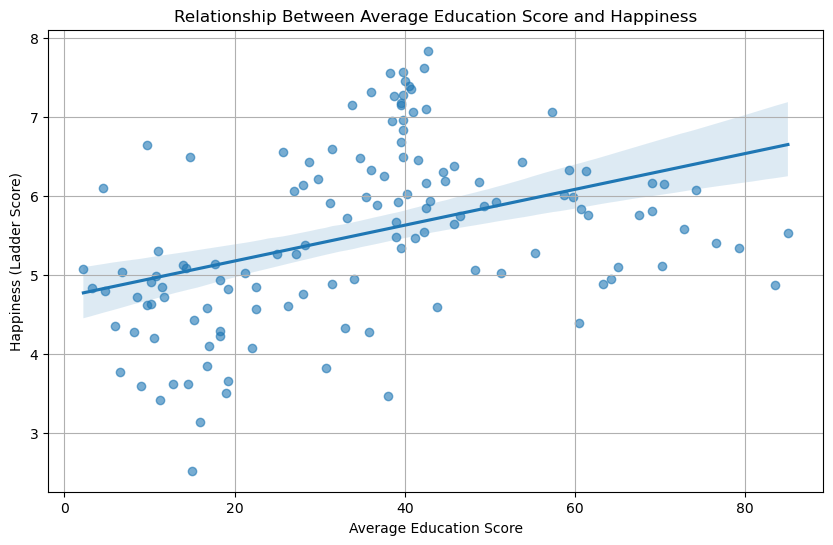

In [88]:

# Filter out entries with 0 values in the average education score
filtered_data = df[df['Average_Education_Score'] != 0]

# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_data, x='Average_Education_Score', y='Ladder score', scatter_kws={'alpha': 0.6})
plt.title('Relationship Between Average Education Score and Happiness')
plt.xlabel('Average Education Score')
plt.ylabel('Happiness (Ladder Score)')
plt.grid(True)

# Calculate Pearson correlation coefficient and p-value
r, p_value = pearsonr(filtered_data['Average_Education_Score'], filtered_data['Ladder score'])
print(f'Pearson correlation between Average Education Score and Happiness: r = {r:.2f}, p-value = {p_value:.2e}')

plt.show()


  Education_Level_Quantile  Count
0                      Low     35
1                   Medium     35
2                     High     35
3                Very High     35


C:\Users\stanp\AppData\Local\Temp\ipykernel_5548\3444942927.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\stanp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



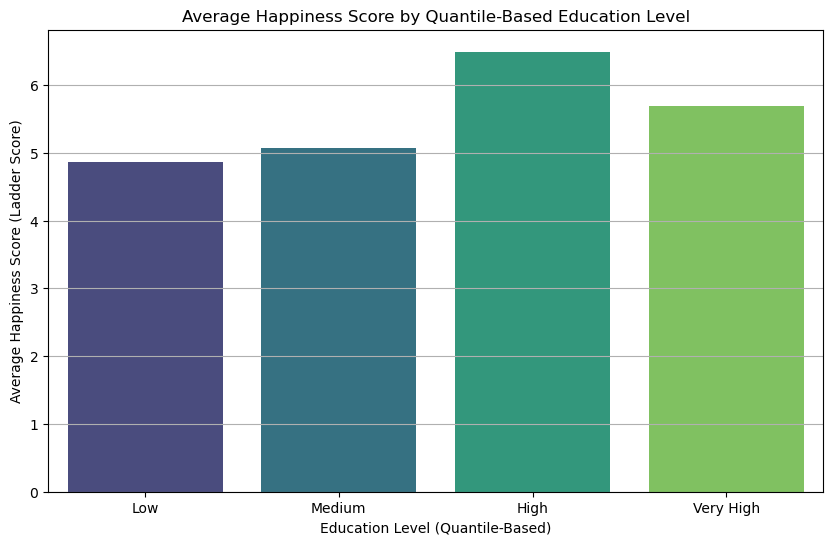

In [89]:


# Define quantile-based categories for the average education score
df['Education_Level_Quantile'] = pd.qcut(df['Average_Education_Score'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Calculate the average happiness score for each quantile-based category
avg_happiness_by_quantile = df.groupby('Education_Level_Quantile')['Ladder score'].mean().reset_index()

# Calculate the count of countries in each quantile-based category
count_by_quantile = df['Education_Level_Quantile'].value_counts().reset_index()
count_by_quantile.columns = ['Education_Level_Quantile', 'Count']

# Display the count of countries in each quantile-based category
print(count_by_quantile)

# Create the bar chart for quantile-based categories
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_happiness_by_quantile['Education_Level_Quantile'], y=avg_happiness_by_quantile['Ladder score'], palette='viridis')
plt.title('Average Happiness Score by Quantile-Based Education Level')
plt.xlabel('Education Level (Quantile-Based)')
plt.ylabel('Average Happiness Score (Ladder Score)')
plt.grid(axis='y')
plt.show()


c:\Users\stanp\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



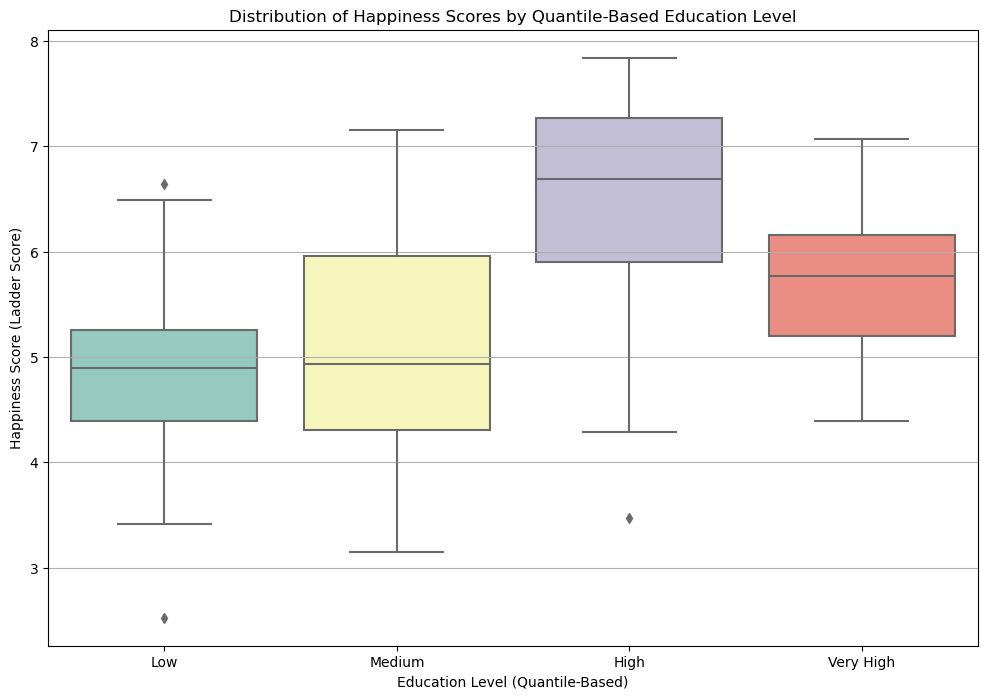

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for the happiness scores by quantile-based education level
plt.figure(figsize=(12, 8))
sns.boxplot(x='Education_Level_Quantile', y='Ladder score', data=df, palette='Set3')
plt.title('Distribution of Happiness Scores by Quantile-Based Education Level')
plt.xlabel('Education Level (Quantile-Based)')
plt.ylabel('Happiness Score (Ladder Score)')
plt.grid(axis='y')
plt.show()


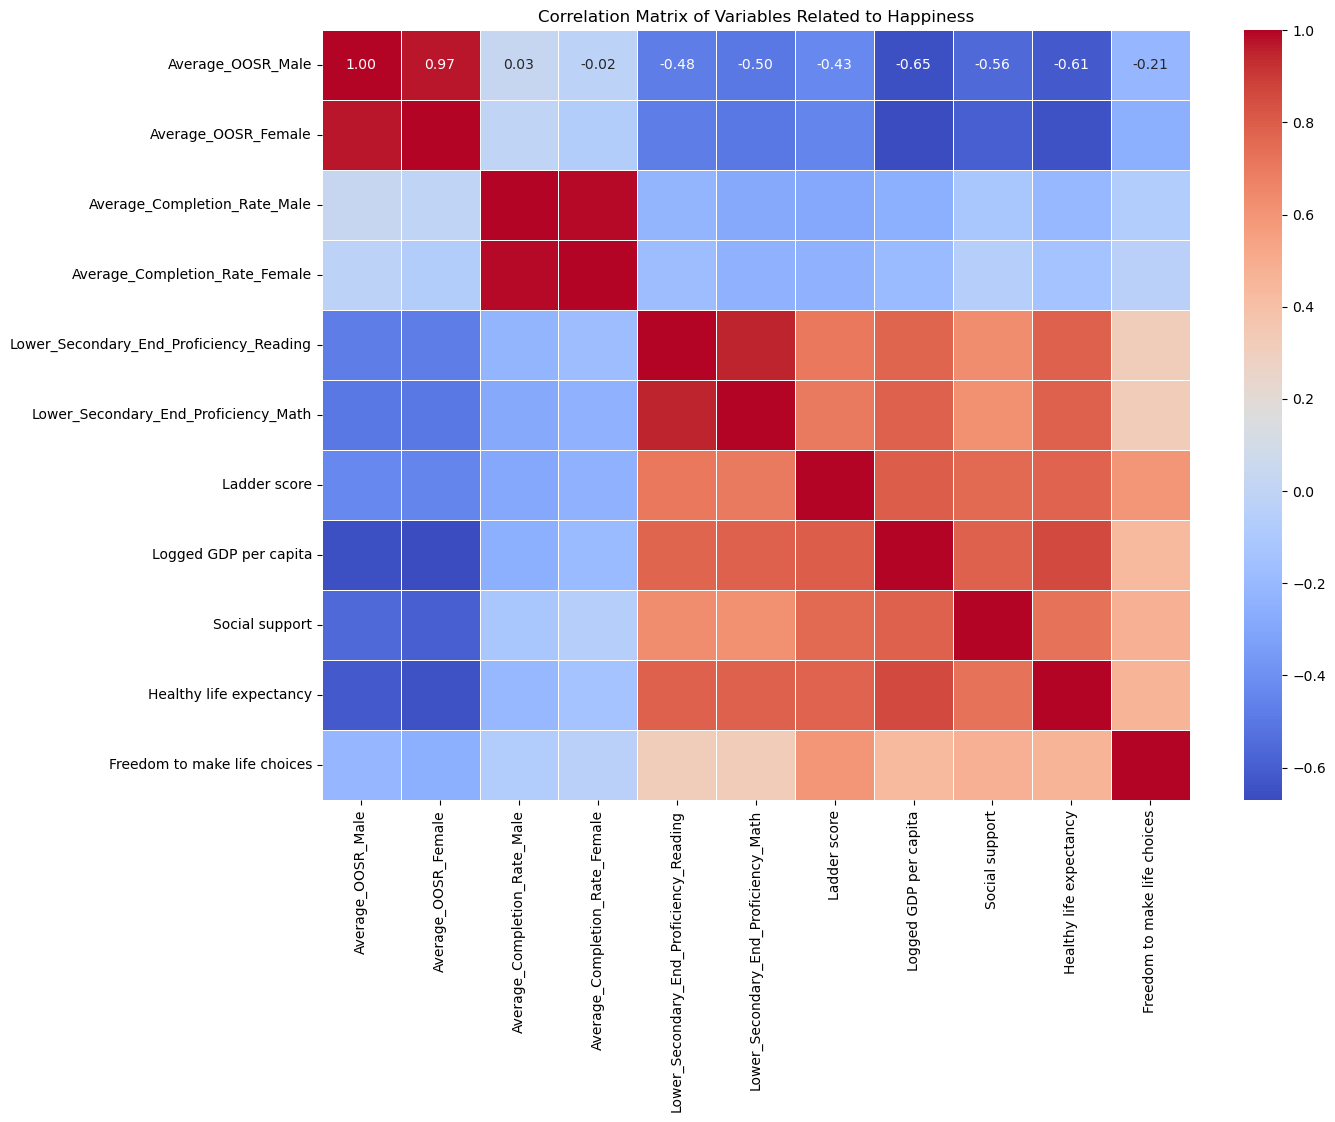

In [91]:

# Calculate the correlation matrix
correlation_matrix = df[['Average_OOSR_Male', 'Average_OOSR_Female', 'Average_Completion_Rate_Male', 
                           'Average_Completion_Rate_Female', 'Lower_Secondary_End_Proficiency_Reading', 
                           'Lower_Secondary_End_Proficiency_Math', 'Ladder score', 'Logged GDP per capita', 
                           'Social support', 'Healthy life expectancy', 'Freedom to make life choices']].corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Variables Related to Happiness')
plt.show()


In [92]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare the data by removing countries with zero scores
filtered_data = df[(df['Average_Education_Score'] != 0) & (df['Ladder score'] != 0)]

# Create the choropleth maps
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"type": "choropleth"}]],
    subplot_titles=("World Map of Happiness Scores in Relation to Average Education Score",)
)

# Happiness score map
happiness_map = px.choropleth(
    filtered_data,
    locations="Country",
    locationmode="country names",
    color="Ladder score",
    hover_name="Country",
    hover_data=["Average_Education_Score", "Ladder score"],
    color_continuous_scale=px.colors.sequential.YlGnBu,
    labels={'Ladder score': 'Happiness Score'}
)

# Education score map
education_map = px.choropleth(
    filtered_data,
    locations="Country",
    locationmode="country names",
    color="Average_Education_Score",
    hover_name="Country",
    hover_data=["Average_Education_Score", "Ladder score"],
    color_continuous_scale=px.colors.sequential.Plasma,
    labels={'Average_Education_Score': 'Average Education Score'}
)

# Add the choropleth maps to the figure
for trace in happiness_map.data:
    fig.add_trace(trace)
    
for trace in education_map.data:
    fig.add_trace(trace)

# Update the layout with buttons
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label="Happiness Score",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "World Map of Happiness Scores in Relation to Average Education Score"}]),
                dict(label="Average Education Score",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "World Map of Average Education Scores"}])
            ],
            direction="down",
            showactive=True
        )
    ]
)

# Update the layout for better visualization
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgrey")
fig.update_layout(coloraxis_colorbar=dict(title="Score"))

fig.show()
